### Accessing Data with API's

**OBJECTIVES**

- More with `groupby` and `.agg`
- Data Access via API


### `.groupby` 

The split-apply-combine paradigm we have explored is incredibly powerful and useful tool.  In addition to performing a single aggregate operation, we can use multiple built in or custom aggregate functions.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### The Data

The dataset `salesdaily.csv` contains daily pharmaceutical sales data and the columns are described as follows:

```
M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives
N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives
N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides
N05B - Psycholeptics drugs, Anxiolytic drugs
N05C - Psycholeptics drugs, Hypnotics and sedatives drugs
R03 - Drugs for obstructive airway diseases
R06 - Antihistamines for systemic use
```

Load in the data and be sure to set a `datetime` index. 

In [8]:
#read in the data
sales = pd.read_csv('data/salesdaily.csv', index_col = 0, parse_dates=True)
sales.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
datum,,,,,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [9]:
#look at the info
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2014-01-02 to 2019-10-08
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   M01AB         2106 non-null   float64
 1   M01AE         2106 non-null   float64
 2   N02BA         2106 non-null   float64
 3   N02BE         2106 non-null   float64
 4   N05B          2106 non-null   float64
 5   N05C          2106 non-null   float64
 6   R03           2106 non-null   float64
 7   R06           2106 non-null   float64
 8   Year          2106 non-null   int64  
 9   Month         2106 non-null   int64  
 10  Hour          2106 non-null   int64  
 11  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(1)
memory usage: 213.9+ KB


**EXAMPLE**

How do the daily average sales of `M01AB` compare to those of `NO5B`?  Construct a horizontal bar chart.

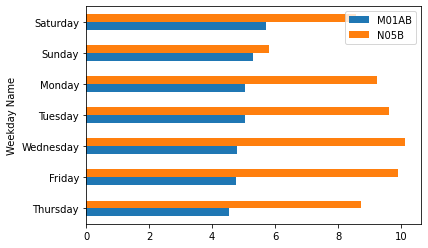

In [13]:
#groupby and then plot -- kind = 'barh'
sales.groupby('Weekday Name')[['M01AB', 'N05B']].mean().sort_values(by = 'M01AB').plot(kind = 'barh');

#### Multiple Summaries with `agg`

Rather than a single aggregate formula, we can use mutliple aggregate functions with the `.agg` method, and pass the functions or common names as strings.  You may also use a custom function.

In [16]:
#mean and standard deviation
sales.groupby('Weekday Name')[['M01AB']].agg(['mean', 'std', 'median', np.median])

M01AB                        
                  mean       std median median
Weekday Name                                  
Friday        4.770476  2.485300   4.50   4.50
Monday        5.055736  2.688525   5.00   5.00
Saturday      5.727755  2.907926   5.01   5.01
Sunday        5.287175  2.908975   5.00   5.00
Thursday      4.549169  2.575230   4.33   4.33
Tuesday       5.047331  2.816525   4.68   4.68
Wednesday     4.797356  2.609771   4.34   4.34

In [17]:
#custom functino to fine range in data
def lowhi(x):
    return x.max() - x.min()

In [18]:
#mean, median, range
sales.groupby('Weekday Name')[['M01AB']].agg(['mean', 'median', lowhi])

M01AB              
                  mean median  lowhi
Weekday Name                        
Friday        4.770476   4.50  12.50
Monday        5.055736   5.00  14.66
Saturday      5.727755   5.01  17.34
Sunday        5.287175   5.00  17.00
Thursday      4.549169   4.33  16.68
Tuesday       5.047331   4.68  14.33
Wednesday     4.797356   4.34  13.68

#### Sparkline Example

In [21]:
# pip install sparklines

Note: you may need to restart the kernel to use updated packages.


In [19]:
import sparklines

In [20]:
#sparklines function
sparklines.sparklines([1, 2, 3, 4,5, 5, 3, 2, 5, 3, 2])

['▁▃▄▆██▄▃█▄▃']

In [22]:
#apply with mean and standard deviation
sales.groupby('Weekday Name')[['M01AB']].agg(['mean', 'std', sparklines.sparklines])

M01AB            \
                  mean       std   
Weekday Name                       
Friday        4.770476  2.485300   
Monday        5.055736  2.688525   
Saturday      5.727755  2.907926   
Sunday        5.287175  2.908975   
Thursday      4.549169  2.575230   
Tuesday       5.047331  2.816525   
Wednesday     4.797356  2.609771   

                                                                 
                                                     sparklines  
Weekday Name                                                     
Friday        [▅▄▂▄▂▂▃▄▅▃▃▄▂▃▄▅▃▅▂▄▄▃▄▂▅▃▃▂▆▄▂▄▃▅▅▃▃▂▃▃▃▃▃▂▄...  
Monday        [▃▅▄▃▃▃▅▄▃▄▅▄▄▄▂▂▂▂▃▅▂▃▄▃▂▄▂▃▂▂▃▅▃▃▃▁▂▃▄▄▂▃▅▄▁...  
Saturday      [▂▃▁▃▃▂▁▄▄▃▃▂▃▂▄▄▃▃▃▂▂▃▅▃▃▁▂▄▄▃▃▃▄▂▂▃▂▃▃▃▂▃▂▂▆...  
Sunday        [▃▂▃▃▄▃▁▁▂▁▂▄▂▂▂▁▃▂▂▂▂▁▁▁▃▁▃▂▂▂▃▃▁▂▁▂▂▁▁▂▂▂▂▃▂...  
Thursday      [▁▄▄▃▂▂▃▄▂▂▂▂▃▁▂▃▂▁▂▂▃▃▁▃▂▂▂▂▂▃▂▂▃▂▂▃▁▂▃▂▁▄▂▁▄...  
Tuesday       [▁▄▂▄▂▆▅▃▄▄▅▃▃▃▃▄▃▅▃▁▁▂▅▃▂▃▄▃▃▂▂▁▇▂▂▄▃▂▆▂▂▂▃▄▅...  
Wednesday     [▄▃▅▄▃▆▃▄▃▄▃▂▂▄▂▄▃▃▂▂▂▂▃▂▅▃▃▃▂▁▄▂▄▃▅▃▂▄▂▃▂▃▄▁▃...

#### `.resample`

Simlar to groupby, with `datetime` indicies you can group on units of time in your data and aggregate across them.  The `.resample` method works similar to `groupby` in that it splits the data into time chunks, and then you apply an aggreagate method.

In [ ]:
# resample by quarter and examine the mean


## Data Input via APIs

This is about using an api "Application program interface" ...basic idea, allows
direct access to some database or parts of it without having do download everything

Documentation is here...

https://pandas-datareader.readthedocs.io/en/latest/index.html

This documentation is good too:

http://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime 

In [25]:
# pip install pandas-datareader

**Quick Example**

Extract five years of 10-year constant maturity yields on U.S. government bonds.

In [26]:
import pandas_datareader as pdr
matyld = pdr.get_data_fred('GS10')

In [27]:
#look at top 5 rows
matyld.head()

,GS10
DATE,
2017-10-01,2.36
2017-11-01,2.35
2017-12-01,2.40
2018-01-01,2.58
2018-02-01,2.86


In [28]:
#look at info
matyld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2017-10-01 to 2022-08-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GS10    59 non-null     float64
dtypes: float64(1)
memory usage: 944.0 bytes


**Excercise** Can you find the unemployment rate for the US from FRED. Use the data reader. And create a plot of unemployment from the 2005 on ward. Challenge, can you create a histogram of unemployment rates?

<AxesSubplot: xlabel='DATE'>

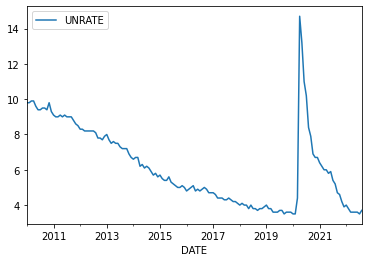

In [31]:
unemp = pdr.get_data_fred('UNRATE', start = '01-01-2010')
unemp.plot()

#### Other Data Sources and Functionality

The documentation [here](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) shows other sources of data from the datareader.  

In [32]:
# extract aapl data from yahoo
apple = pdr.get_data_yahoo('AAPL')
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-02,38.612499,38.180000,38.564999,38.452499,74795200.0,36.493938
2017-10-03,38.772499,38.477501,38.502499,38.619999,64921200.0,36.652912
2017-10-04,38.465000,38.115002,38.407501,38.369999,80655200.0,36.415642
2017-10-05,38.860001,38.512501,38.544998,38.847500,85135200.0,36.868813
2017-10-06,38.872501,38.639999,38.742500,38.825001,69630400.0,36.847458


<AxesSubplot: xlabel='Date'>

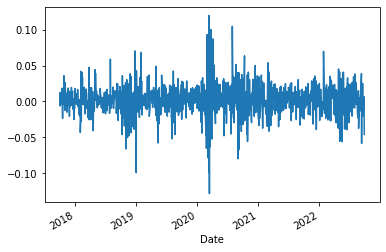

In [34]:
# plot percent change in Adj Close
apple['Adj Close'].pct_change().plot()

<AxesSubplot: xlabel='Date'>

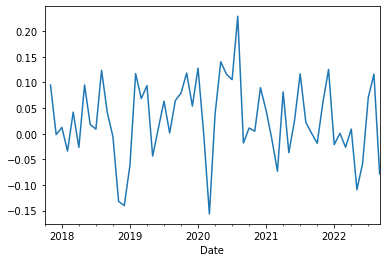

In [37]:
apple.resample('M').mean()['Adj Close'].pct_change().plot()

**Exercise** Grab luluemon's data. Plot the `Adj Close` and the volume since the begining of the year.

In [41]:
lulu = pdr.get_data_yahoo(['LULU', 'AAPL'])
lulu.head()

Attributes  Adj Close                 Close                  High             \
Symbols          LULU       AAPL       LULU       AAPL       LULU       AAPL   
Date                                                                           
2017-10-02  62.830002  36.493927  62.830002  38.452499  63.209999  38.612499   
2017-10-03  62.220001  36.652908  62.220001  38.619999  63.349998  38.772499   
2017-10-04  61.340000  36.415642  61.340000  38.369999  62.599998  38.465000   
2017-10-05  61.759998  36.868816  61.759998  38.847500  62.279999  38.860001   
2017-10-06  61.299999  36.847469  61.299999  38.825001  62.080002  38.872501   

Attributes        Low                  Open                Volume              
Symbols          LULU       AAPL       LULU       AAPL       LULU        AAPL  
Date                                                                           
2017-10-02  61.740002  38.180000  62.169998  38.564999  2116200.0  74795200.0  
2017-10-03  61.910000  38.477501  62.980000  38.502499  1654400.0  64921200.0  
2017-10-04  61.259998  38.115002  62.139999  38.407501  1137000.0  80655200.0  
2017-10-05  61.169998  38.512501  61.279999  38.544998  1251900.0  85135200.0  
2017-10-06  61.139999  38.639999  61.740002  38.742500  1257600.0  69630400.0

<AxesSubplot: xlabel='Date'>

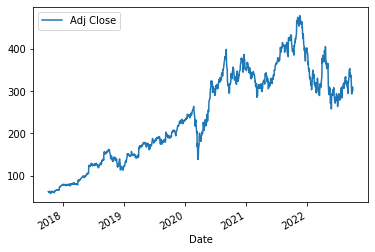

In [40]:
lulu[['Adj Close']].plot()

### Accessing Data Without a Library

In the `pandas_datareader` we have a library written in Python that interacts with data for us.  Sometimes, this is not possible and you will need to interact with the data in a more general environment.  Let's try this out by looking up some information about cats.  Here is the documentation [link](https://developers.thecatapi.com/view-account/ylX4blBYT9FaoVd6OhvR?report=bOoHBz-8t). 

![](images/catapi.png)

In [42]:
import requests

**Response**

- Random Cat: https://api.thecatapi.com/v1/images/search
- 10 Bengal Cats: https://api.thecatapi.com/v1/images/search?limit=10&breed_ids=beng&api_key=REPLACE_ME

In [43]:
#url for a random cat
url = 'https://api.thecatapi.com/v1/images/search'

In [44]:
#request of the url
r = requests.get(url)

In [45]:
#look at response code
r

<Response [200]>

In [46]:
#text of request
r.text

'[{"id":"a9n","url":"https://cdn2.thecatapi.com/images/a9n.jpg","width":480,"height":640}]'

In [47]:
#examine the json
r.json()

[{'id': 'a9n',
  'url': 'https://cdn2.thecatapi.com/images/a9n.jpg',
  'width': 480,
  'height': 640}]

In [48]:
#repeat for bengal cats
#url
url = 'https://api.thecatapi.com/v1/images/search?limit=10&breed_ids=beng&api_key=REPLACE_ME'
#make request
r = requests.get(url)
#turn into json
r.json()

[{'id': 'J2PmlIizw',
  'url': 'https://cdn2.thecatapi.com/images/J2PmlIizw.jpg',
  'width': 1080,
  'height': 1350},
 {'id': 'LSaDk6OjY',
  'url': 'https://cdn2.thecatapi.com/images/LSaDk6OjY.jpg',
  'width': 1080,
  'height': 1080},
 {'id': '8pCFG7gCV',
  'url': 'https://cdn2.thecatapi.com/images/8pCFG7gCV.jpg',
  'width': 750,
  'height': 937},
 {'id': 'IFXsxmXLm',
  'url': 'https://cdn2.thecatapi.com/images/IFXsxmXLm.jpg',
  'width': 973,
  'height': 973},
 {'id': '8ciqdpaO5',
  'url': 'https://cdn2.thecatapi.com/images/8ciqdpaO5.jpg',
  'width': 1080,
  'height': 809},
 {'id': 'VZ3qFLIe3',
  'url': 'https://cdn2.thecatapi.com/images/VZ3qFLIe3.jpg',
  'width': 750,
  'height': 937},
 {'id': '8RsP7Xt3h',
  'url': 'https://cdn2.thecatapi.com/images/8RsP7Xt3h.jpg',
  'width': 1024,
  'height': 817},
 {'id': 'byQhFO7iV',
  'url': 'https://cdn2.thecatapi.com/images/byQhFO7iV.jpg',
  'width': 1795,
  'height': 2397},
 {'id': 'bz15V3Kvg',
  'url': 'https://cdn2.thecatapi.com/images/bz15V3K

In [49]:
#extract the links to images
[cat['url'] for cat in r.json() ]

['https://cdn2.thecatapi.com/images/J2PmlIizw.jpg',
 'https://cdn2.thecatapi.com/images/LSaDk6OjY.jpg',
 'https://cdn2.thecatapi.com/images/8pCFG7gCV.jpg',
 'https://cdn2.thecatapi.com/images/IFXsxmXLm.jpg',
 'https://cdn2.thecatapi.com/images/8ciqdpaO5.jpg',
 'https://cdn2.thecatapi.com/images/VZ3qFLIe3.jpg',
 'https://cdn2.thecatapi.com/images/8RsP7Xt3h.jpg',
 'https://cdn2.thecatapi.com/images/byQhFO7iV.jpg',
 'https://cdn2.thecatapi.com/images/bz15V3Kvg.jpg',
 'https://cdn2.thecatapi.com/images/4-5SzDNIL.jpg']

**Problem**: 

![](https://dog.ceo/img/dog-api-logo.svg)

Head over to the Dog API [here](https://dog.ceo/dog-api/).  

1. Make a request that returns a list of all dog breeds.

2. Make a request that returns a random image of a dog and extract the url.  

### ALPHA VANTAGE

A more detailed example than that of `pandas_datareader`.  The API for Alpha Vantage provides many Forex and Crypto feeds as well as economic and technical indicators.  To use it, you will need an API key -- so head over to [here](https://www.alphavantage.co/#page-top) and let's sign up for one. 

![](images/alpha.png)

In [50]:
base_url = 'https://www.alphavantage.co/query'
req = requests.get(
    base_url,
    params={
        "function": "TIME_SERIES_DAILY",
        "symbol": "AAPL",
        "apikey": "LW9XCI6UYMQY5E14"
    }
)

In [55]:
#examine the response
pd.DataFrame(req.json()['Time Series (Daily)']).T

,1. open,2. high,3. low,4. close,5. volume
2022-09-28,147.6400,150.6414,144.8400,149.8400,146691387
2022-09-27,152.7400,154.7200,149.9450,151.7600,84442741
2022-09-26,149.6600,153.7701,149.6400,150.7700,93339409
2022-09-23,151.1900,151.4700,148.5600,150.4300,96029909
2022-09-22,152.3800,154.4700,150.9100,152.7400,86264792
...,...,...,...,...,...
2022-05-12,142.7700,146.2000,138.8000,142.5600,182602041
2022-05-11,153.5000,155.4500,145.8100,146.5000,142689825
2022-05-10,155.5200,156.7400,152.9300,154.5100,115366736
2022-05-09,154.9250,155.8300,151.4900,152.0600,131577921


In [56]:
#extract the headline
base_url = 'https://www.alphavantage.co/query'
req = requests.get(
    base_url,
    params={
        "function": "NEWS_SENTIMENT",
        "symbol": "AAPL",
        "apikey": "LW9XCI6UYMQY5E14"
    }
)
req.json()

{'items': '50',
 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish',
 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.',
 'feed': [{'title': 'Influenza Diagnostics Market worth $1.1 billion by 2026 - Exclusive Report by MarketsandMarkets™',
   'url': 'https://www.benzinga.com/pressreleases/22/09/g29076312/influenza-diagnostics-market-worth-1-1-billion-by-2026-exclusive-report-by-marketsandmarkets',
   'time_published': '20220929T143000',
   'authors': ['Globe Newswire'],
   'summary': 'Chicago, Sept. 29, 2022 ( GLOBE NEWSWIRE ) -- According to the new market research report "Influenza Diagnostics Market by Product ( Test Kits, Instruments ) , Test Type ( Traditional ( RIDT, Viral Culture, Serological ) , Molecular ( PCR, INAAT- NASBAT, TMABAS ) ) , End User ( Diagnostic ...',
   'banner_image': '',
   'source': 'Benzinga',


**Exercise**

Use the `TIME_SERIES_DAILY` endpoint to extract data for `AAPL`. 

### Different Endpoints

Let's explore some news about Apple.  The documentation on the news & sentiment endpoint is [here](https://www.alphavantage.co/documentation/#news-sentiment). 

In [ ]:
base_url = 'https://www.alphavantage.co/query'

In [ ]:
#news about AAPL


**PROBLEM**: Extract weekly data for bitcoin (`BTC`) from the Cryptocurrency endpoint in Alpha Vantage.


#### API Wrappers

Often, someone has written a library to wrap the API.  For example, there is an alpha vantage Python API wrapper:

- https://github.com/RomelTorres/alpha_vantage

Let's head over, install the library, and retrieve some intraday returns.

#### Summary

Great job!  Now, you have additional tools for going out and accessing data from a variety of sources.  Your homework this week will involve extracting further information from the API's and visualizing this with `seaborn` and `matplotlib`.